In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
def time_signal(file, code):

    import re
    try:
        data = pd.read_csv(f"../../{file}.csv")
        for key in data:
            if re.findall(rf"({code})", key):
                dict_code = key
        unit_conv = 0.0254
        x = data[dict_code] * unit_conv
        return x
    except:
        print('File does not exist or code wrong. Code must be either "DE or "FE" ')

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


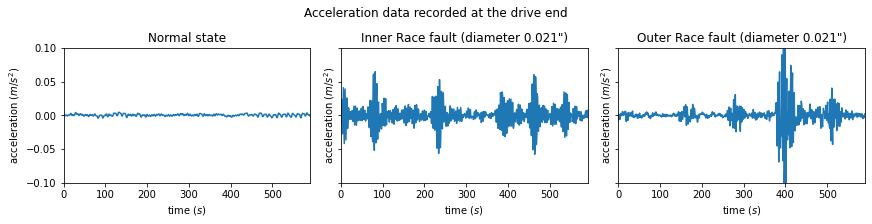

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

normal_sig = time_signal(file='NB', code='DE')
ir_sig = time_signal(file='IR - 21', code='DE') 
or_sig = time_signal(file='OR - 21', code='DE') 

# plotting

fig, (plt1, plt2, plt3) = plt.subplots(1, 3, sharey = True, figsize=(12, 3), constrained_layout=True)
plt1.set_xlabel("time $(s)$")
plt1.set_ylabel("acceleration $(m/s^2)$")
plt1.set_title('Normal state')
plt1.axis((0,591,-0.1,0.1))
plt1.plot(normal_sig)
plt2.set_xlabel("time $(s)$")
plt2.set_ylabel("acceleration $(m/s^2)$")
plt2.set_title('Inner Race fault (diameter 0.021")')
plt2.axis((0,591,-0.1,0.1))
plt2.plot(ir_sig)
plt3.set_xlabel("time $(s)$")
plt3.set_ylabel("acceleration $(m/s^2)$")
plt3.set_title('Outer Race fault (diameter 0.021")')
plt3.axis((0,591,-0.1,0.1))
plt3.plot(or_sig)
fig.suptitle('Acceleration data recorded at the drive end')
fig.show()

In [4]:
# Importing the dataset
dataset = pd.read_csv('../CWRU Dataset-2.csv')
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 0:1].values

In [5]:
dataset.head(5)

,Bearing,Fault Diameter,DE,FE
0,Normal,0.0,0.064254,0.038625
1,Normal,0.0,0.063002,0.096769
2,Normal,0.0,-0.004381,0.127382
3,Normal,0.0,-0.035882,0.144640
4,Normal,0.0,-0.023991,0.086702


In [6]:
#Retrieve Random Data
dataset.sample(10)

,Bearing,Fault Diameter,DE,FE
310641,"Outer Race (0.021"")",0.021,0.005279,0.153680
249155,"Outer Race (0.021"")",0.021,-0.057258,-0.058965
118135,Normal,0.000,-0.039428,0.102316
148521,"Inner Race (0.021"")",0.021,-0.039391,0.116493
102818,Normal,0.000,0.036925,0.102727
111928,Normal,0.000,0.015855,-0.108685
119044,Normal,0.000,-0.069678,0.038831
162812,"Inner Race (0.021"")",0.021,0.056852,0.020751
356192,"Outer Race (0.021"")",0.021,-0.090151,-0.209153
117469,Normal,0.000,-0.157922,0.041091


In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y[:,0] = labelencoder_y.fit_transform(y[:,0])
y = y.astype('int')

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
classifier.score(X_test, y_test)

0.708237010127697

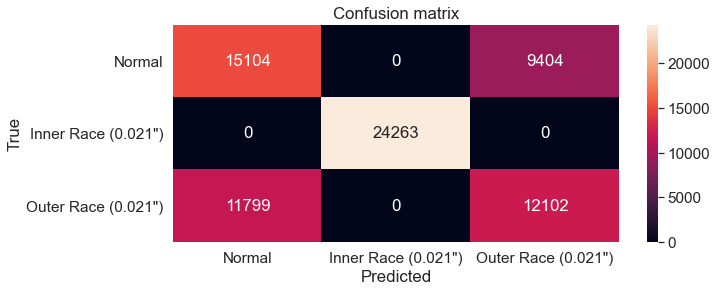

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal','Inner Race (0.021")', 'Outer Race (0.021")']  
columns = ['Normal','Inner Race (0.021")', 'Outer Race (0.021")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Inner Race (0.021")', 'Outer Race (0.021")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.56      0.62      0.59     24508
Inner Race (0.021")       1.00      1.00      1.00     24263
Outer Race (0.021")       0.56      0.51      0.53     23901

           accuracy                           0.71     72672
          macro avg       0.71      0.71      0.71     72672
       weighted avg       0.71      0.71      0.71     72672

